Водопьян А.О. Хабибуллин Р.А. 2019 г. 2024 г.


## Давление насыщения нефти газом
<a id="Pb"></a>

### Давление насыщения, корреляция Стендинга
<a id="Pb_Standing"></a>

Корреляция Стендинга для оценки давления насыщения нефти газом. 

$$ P_b =  0.5197  \left( \frac{R_{sb}}{\gamma_g}\right)^{0.83} 10 ^{y_g} $$

где

$P_b$ - давление насыщения, $МПа$ 

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3 $

$\gamma_g$ - относительная плотность газа, безразмерная величина  

$y_g$ - мольная доля газа, $ y_g = 1.225 +0.00164 T - \frac{ 1.769}{\gamma_o}$

$\gamma_o$ - относительная плотность нефти, безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


 
 


ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sympy import *
init_printing()
import sys
sys.path.append('../')
import neftpy.upvt_oil as pvto
import neftpy.upvt_np_vect as pvtv


In [2]:
# Корреляция Стендинга для давления насыщения реализована 
# в виде функции unf_pb_Standing_MPaa в модуле PVT_correlations. 
# Подробные данные по функции включая исходный код приведены ниже

pvto.unf_pb_Standing_MPaa??

Signature:
pvto.unf_pb_Standing_MPaa(
    rsb_m3m3: float = 100,
    gamma_oil: float = 0.86,
    gamma_gas: float = 0.6,
    t_K: float = 350,
) -> float
Source:   
def unf_pb_Standing_MPaa(rsb_m3m3:float=100, 
                         gamma_oil:float=0.86, 
                         gamma_gas:float=0.6, 
                         t_K:float=350
                         )->float:
    """
    Расчет давления насыщения Standing (1947)

    :param rsb_m3m3: газосодержание при давлении насыщения, должно быть указано, м3/м3 
    :param gamma_oil: удельная плотность нефти (от воды) 
    :param gamma_gas: удельная плотность газа (от воздуха) 
    :param t_K: температура, К 
    :return: давление насыщения, МПа абсолютное 

    ref1 "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases",
    M.B. Standing, Drill. & Prod. Prac., API, 1947.

    ref2  "Стандарт компании Юкос. Физические свойства нефти. Методы расчета." Афанасьев В.Ю., Хасанов М.М. и др. 2002 г
    """

в приведеном коде использована коррекция значений давления насыщения при низких значениях газосодержания при давлении насыщения для обеспечения выхода на значение $P_b = 1$ при $R{sb} = 0$

<img  src="pics/Pb-Standing_comparison.png" width="600"  >

---
Построим пару графиков, используя приведенную функцию

In [3]:
# параметры определяющие диапазоны значений для построения графиков
rsb_set=np.arange(1,300,10)
t_set=np.arange(273,380,30)
t_set_def=np.array([313])
gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])

# функция для автоматизации построения графиков по давлению насыщения
def prep_plot(func, tset, goset, ggset, plot_title, plot_xlab, plot_ylab, plot_lab):
    for t in tset:
        for gg in ggset:
            for go in goset:
                pb_set=[]
                for rsb in rsb_set:
                    pb_set.append(func(rsb,t_K = t,gamma_gas = gg,gamma_oil = go))
                plt.plot(rsb_set, pb_set, label=r't = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                                 r' $\gamma_g$ = %1.2f'%gg + 
                                                 r' $\gamma_o$ = %1.2f'%go + ': '+ plot_lab)
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()


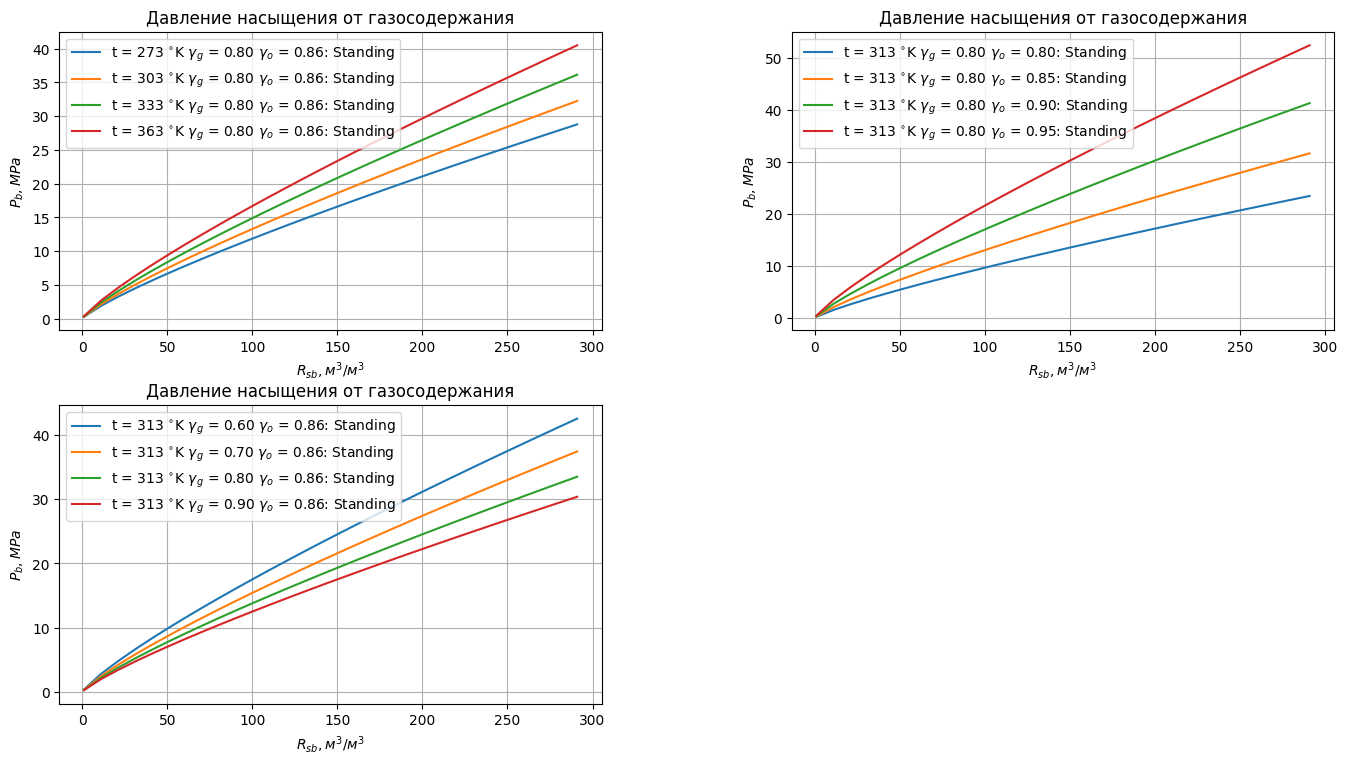

In [4]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = pvto.unf_pb_Standing_MPaa
# рисуем первый график
plt.subplot(221)
prep_plot(f,t_set,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Standing')
plt.grid()
# рисуем второй график
plt.subplot(222)
prep_plot(f,t_set_def,go_set,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Standing')
plt.grid()
# рисуем третий график
plt.subplot(223)
prep_plot(f,t_set_def,go_set_def,gg_set,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Standing')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()


---
<a id="Pb_Valco"></a>
### Давление насыщения, корреляция Valko McCain


Корреляция Valco McCain (2003) для оценки давления насыщения нефти газом разработана на основе банка данных нефтей со всего мира. На рисунке показаны источники данных, которые были использованы авторами для настройки корреляции.  

<img  src="pics/McCain_corr_sources.png" width="400"  >


Диапазоны значений основных свойств (1745 значений), использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Мин|Среднее|Макс|
| :--- | :---: |:---:|:---:|
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.55  |15.0|45.5|
| <p align="left"> температура, $^{\circ}\mathrm{С} $ | 15 |85|172|
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 2 |104|395|
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.724  |0.846|1.02|
| <p align="left"> относительная плотность газа на сепараторе, $\gamma_g$  | 0.555  |0.838|1.685|
    
По результатам сравнений с замеренными значениями абсолютная значение средней относительной ошибки (AARE) для корреляции составляет около 11%. Авторы отмечают, что полученная точность соответствует точности замеров использованных для построения корреляции и для построения более точных зависимостей потребуется сбор новых данных с повышенной точностью.

$$
ln P_b = 7.475 + 0.713 z + 0.0075 z^2
$$
где 

$$
z = z_1+z_2+z_3+z_4
$$
$$
z_1 = -5.48 - 0.0375\cdot ln R_{sb}+0.281\cdot (ln R_{sb})^2 - 0.0206\cdot (ln R_{sb})^3
$$
$$
z_2 = 1.27 - 0.0449\cdot API +4.36 \cdot 10^{-4} API^2 -4.76 \cdot 10^{-6} API^3
$$
$$
z_3 = 4.51 - 10.84 \cdot \gamma_{gSP} +8.39\cdot \gamma_{gSP}^2 -2.34\cdot \gamma_{gSP}^3
$$
$$
z_4 = -0.7835 + 6.23 \cdot 10^{-3} \cdot T_R - 1.22 \cdot 10^{-5} \cdot T_R^2+ 1.03 \cdot 10^{-8} \cdot T_R^3
$$

где

* $p_b$ - давление насыщения, $psia$
* $R_{sb}$ - газосодержание при давлении насыщения, ${scf}/{STB}$
* $\gamma_{gSP}$ - удельная плотность газа, отобранного на сепараторе, безразмерная величина
* $T_R$ - пластовая температура, $F$


ref Reservoir oil bubblepoint pressures revisited; solution gas-oil ratios and surface gas specific gravities. P.P.Valko, W.D.McCain Jr. Journal of petroleum science and engineering 37(2003) 153-169

---
#### Пребразование единиц измерения для корреляции Валко Маккейна

In [5]:
# объявления переменных необходимых для преобразования единиц в вырожении
rsb_scfSTB, rsb_m3m3 = symbols('R_sb[scfSTB] R_sb[m3m3]')
API, gamma_o = symbols('API gamma_o')
gamma_gSP = symbols('gamma_gSP')
T_RF,T_RK = symbols('T_R[F] T_R[K]')
z,z1,z2,z3,z4 = symbols('z,z1,z2,z3,z4')
p_bpsia, p_bMPaa = symbols('p_b[psia],p_b[MPaa]')

In [6]:
# определение алгоритма расчета в американских промысловых единицах
eq1 = Eq(z,z1+z2+z3+z4)
eq2 = Eq(z1,  -5.48 - 0.03758 * ln(rsb_scfSTB)+ 0.281*  ln(rsb_scfSTB)**2 - 0.0206* ln(rsb_scfSTB)**3)
eq3 = Eq(z2,  1.27 - 0.0449* API +4.36 * 10**-4 *API**2 -4.76 * 10**-6 *API**3)
eq4 = Eq(z3,  4.51- 10.84 *gamma_gSP +8.39*gamma_gSP**2 -2.34*gamma_gSP**3 )
eq5 = Eq(z4,  -0.7835 + 6.23 * 10**-3 * T_RF - 1.22 * 10**-5 * T_RF**2+ 1.03 * 10**-8 * T_RF**3)
eq6 =Eq(ln(p_bpsia),(7.475 + 0.713 * z + 0.0075 * z**2))
# покажем выражения в печатном виде
display(eq6)
display(eq1)
display(eq2)
display(eq3)
display(eq4)
display(eq5)

In [7]:
# выражения для преобразования единиц измерения из американских промысловых в практические метрические
scfSTB_to_m3m3 = rsb_m3m3/0.178107606679035
API_to_gamma_o = 141.5/gamma_o-131.5
F_to_K = T_RK*9/5-459.67
psi_to_MPa = p_bMPaa * 14.6959 * 10.1325
# покажем выражения в печатном виде
display(Eq(rsb_scfSTB , scfSTB_to_m3m3))
display(Eq(API,API_to_gamma_o))
display(Eq(T_RF,F_to_K))
display(Eq(p_bpsia,psi_to_MPa))

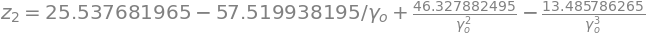

In [8]:
# преобразование алгоритма в метрические единицы с использованием символьных вычислений
eq2_m=simplify(eq2.subs(rsb_scfSTB,scfSTB_to_m3m3))
eq3_m=simplify(eq3.subs(API,API_to_gamma_o))
eq5_m=simplify(eq5.subs(T_RF,F_to_K))
eq6_m=eq6.subs(p_bpsia, psi_to_MPa)
eq8=solve(eq6_m,p_bMPaa)
eq9=Eq(p_bMPaa, eq8[0])
# вывод результатов преобразований
display(eq9)
display(eq1)
display(eq2_m)
display(eq3_m)
display(eq4)
display(eq5_m)

In [9]:
# расчет реализован в функции  unf_pb_Valko_MPaa
pvto.unf_pb_Valko_MPaa??

Signature:
pvto.unf_pb_Valko_MPaa(
    rsb_m3m3: float = 100,
    gamma_oil: float = 0.86,
    gamma_gas: float = 0.6,
    t_K: float = 350,
) -> float
Source:   
def unf_pb_Valko_MPaa(rsb_m3m3:float=100, 
                        gamma_oil:float=0.86, 
                        gamma_gas:float=0.6,
                        t_K:float=350
                        )->float:
    """
    Расчет давления насыщения Valko McCain (2002)

    :param rsb_m3m3: газосодержание при давлении насыщения, должно быть указано, м3/м3 
    :param gamma_oil: удельная плотность нефти (от воды) 
    :param gamma_gas: удельная плотность газа (от воздуха) 
    :param t_K: температура, К 
    :return: давление насыщения, МПа абсолютное 

    ref SPE  "Reservoir oil bubblepoint pressures revisited; solution gas–oil ratios and surface gas specific gravities"
    W. D. McCain Jr.,P.P. Valko,
    """

    min_rsb = 1.8
    max_rsb = 800
    rsb_old = np.copy(rsb_m3m3)
    rsb_m3m3 = np.where(rsb_m3m3 < min_rsb, min_rsb,

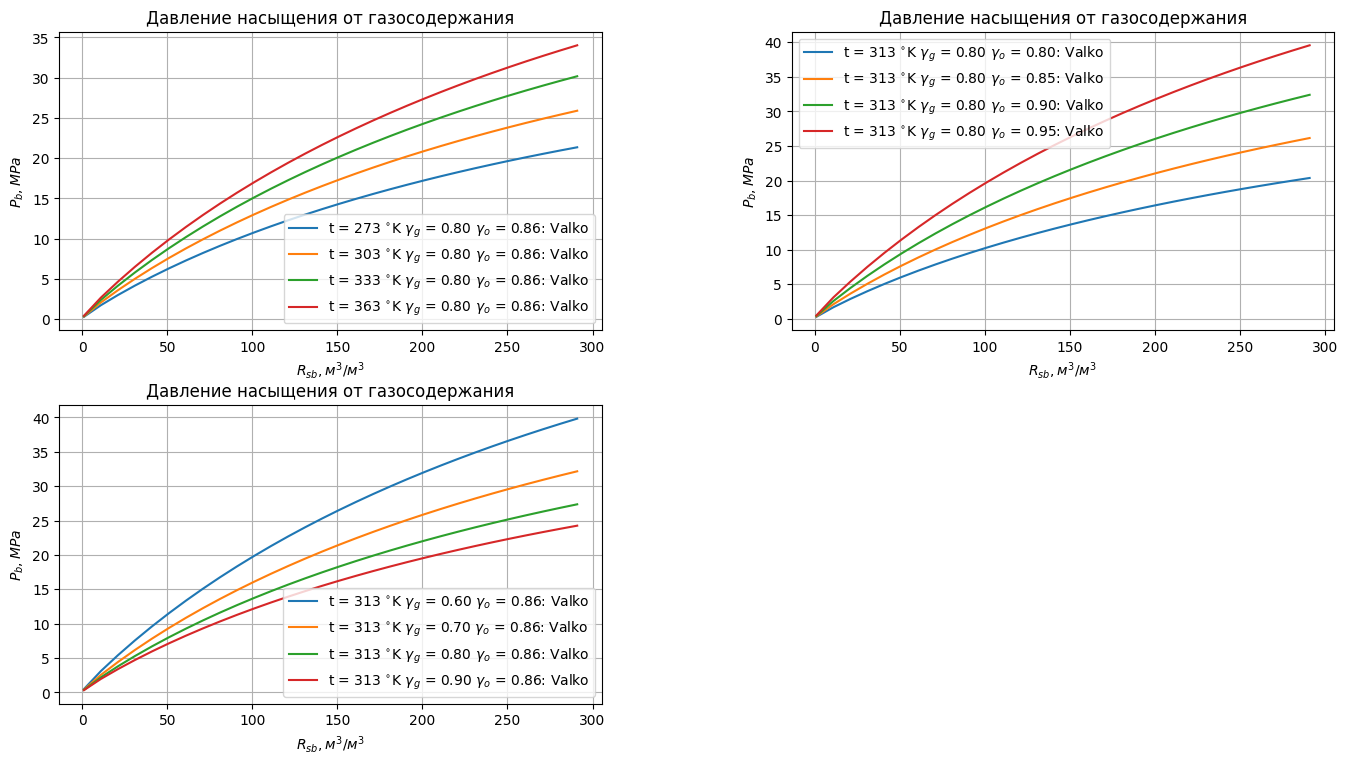

In [10]:
plt.figure(figsize=(15,8))
f = pvto.unf_pb_Valko_MPaa
# рисуем первый график
plt.subplot(221)
prep_plot(f,t_set,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Valko')
plt.grid()
# рисуем второй график
plt.subplot(222)
prep_plot(f,t_set_def,go_set,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Valko')
plt.grid()
# рисуем третий график
plt.subplot(223)
prep_plot(f,t_set_def,go_set_def,gg_set,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Valko')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

в приведеном коде использована коррекция значений давления насыщения при низких значениях газосодержания при давлении насыщения для обеспечения выхода на значение $P_b = 1$ при $R{sb} = 0$ и при больших значениях газосодержания

<img  src="pics/Pb-Valko_comparison.png" width="600"  >

следует отметить, что в отличии от корреляций типа Стендинга корреляция Валко Макейна хорошо описывает исходный набор данных в пределах области применимости, но дает нефизичные результаты за пределами диапазона применимости. Приведенная в коде корректировке может частично сгладить экспраполированные значения, но лучше при проведении расчетов контролировать, чтобы корреляция применялась в пределах диапазона примемости. 

# Корреляция Гласо для давления насыщения

на основе данных по нефтям Северного моря

In [11]:
pvto.unf_pb_Glaso_MPaa??

Signature: pvto.unf_pb_Glaso_MPaa(rs_m3m3, t_K, gamma_oil, gamma_gas)
Source:   
def unf_pb_Glaso_MPaa(rs_m3m3, t_K, gamma_oil, gamma_gas):
    """
        Glaso correlation(1980) for bubble point pressure

    :param rs_m3m3: gas-oil ratio in m3/m3
    :param t_K: temperature in K
    :param gamma_oil: oil density (by water)
    :param gamma_gas: gas density (by air)
    :return: bubble point pressure im MPa abs

    ref Generalized Pressure-Volume-Temperature Correlations, Glaso, 1980
    """

    #  можно дополнить код, поправками на неуглеводородные составляющие в нефти, в статье есть
    api = gamma_oil_2_api(gamma_oil)
    t_F = K_2_F(t_K)
    rs_scfstb = m3m3_2_scfstb(rs_m3m3)
    pb = (rs_scfstb / gamma_gas) ** 0.816 * (t_F ** 0.172 / api ** 0.989)
    log_pb = np.log10(pb)
    pb = psi_2_MPa(10 ** (1.7669 + 1.7447 * log_pb - 0.30218 * log_pb ** 2)) 
    return pb
File:      c:\unifloc\neftpy\neftpy\upvt_oil.py
Type:      function

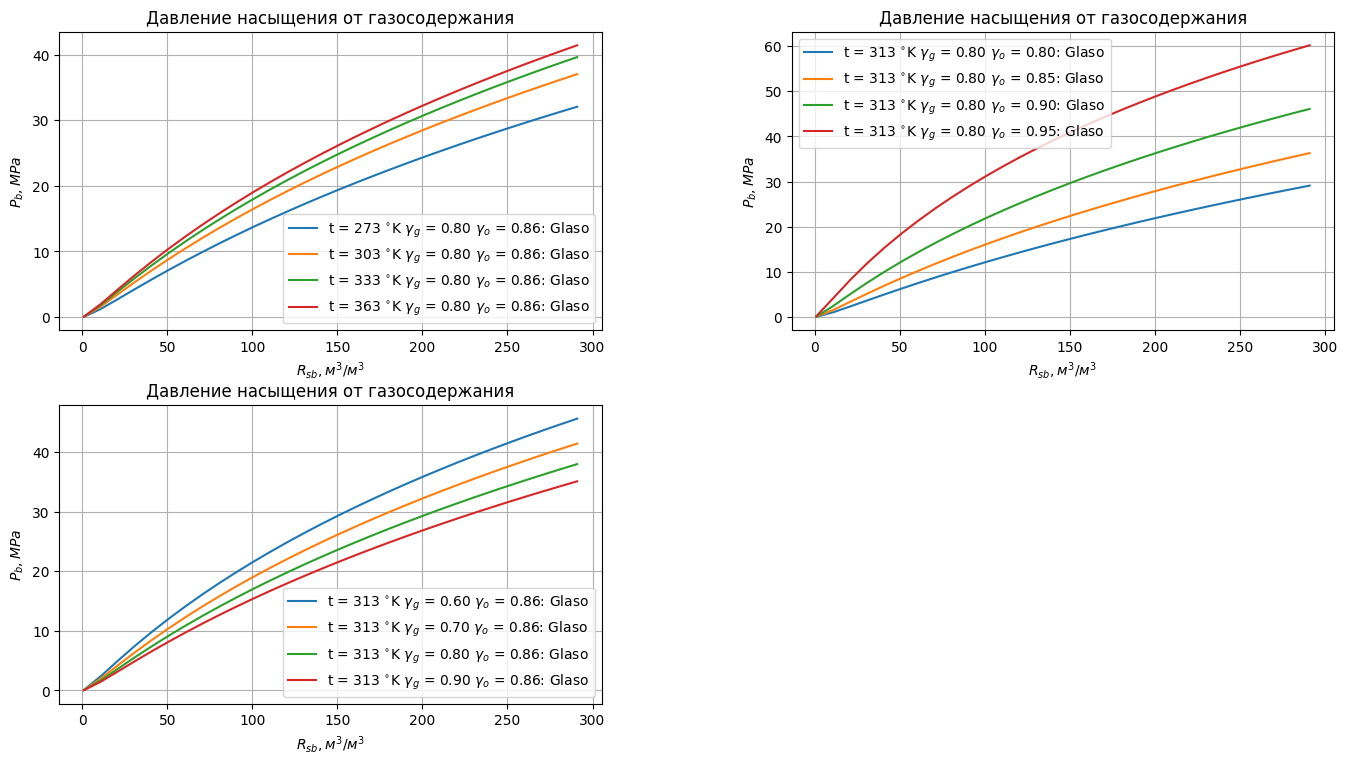

In [12]:
plt.figure(figsize=(15,8))
f = pvto.unf_pb_Glaso_MPaa
# рисуем первый график
plt.subplot(221)
prep_plot(f,t_set,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Glaso')
plt.grid()
# рисуем второй график
plt.subplot(222)
prep_plot(f,t_set_def,go_set,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Glaso')
plt.grid()
# рисуем третий график
plt.subplot(223)
prep_plot(f,t_set_def,go_set_def,gg_set,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Glaso')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

# Сравнение разных корреляций

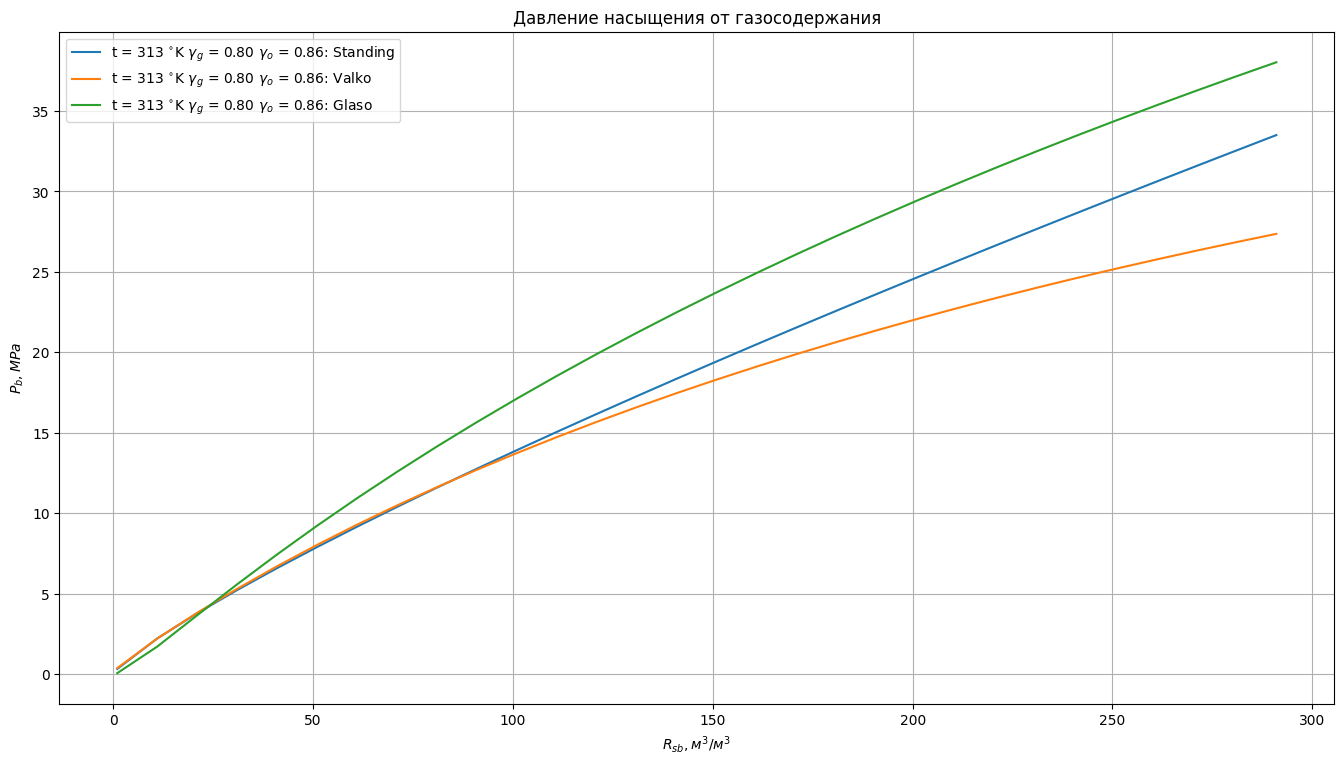

In [13]:
# параметры определяющие диапазоны значений для построения графиков
rsb_set=np.arange(1,300,10)
t_set=np.arange(273,380,30)
t_set_def=np.array([313])
gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])


plt.figure(figsize=(15,8))
f1 = pvto.unf_pb_Standing_MPaa
f2 = pvto.unf_pb_Valko_MPaa
f3 = pvto.unf_pb_Glaso_MPaa


prep_plot(f1,t_set_def,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Standing')
prep_plot(f2,t_set_def,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Valko')
prep_plot(f3,t_set_def,go_set_def,gg_set_def,
              'Давление насыщения от газосодержания',
               '$R_{sb}, м^3/м^3$',
               '$P_b, MPa$',
               'Glaso')


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()